# **Segmentasi Pasar Digital dan Analisis Karakteristik Produk Game pada Platform Steam Menggunakan Metode K-Means Clustering**

**1. Instalasi & Loading Dataset**

In [1]:
!pip install opendatasets -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import joblib

# Load data
df = pd.read_csv("games.csv")

**2. Data Loading & Profile Dataset**

In [2]:
# Menampilkan informasi dasar dataset
print("--- Profile Dataset ---")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print("\nInformasi Tipe Data:")
print(df.info())

--- Profile Dataset ---
Jumlah baris: 122611
Jumlah kolom: 39

Informasi Tipe Data:
<class 'pandas.core.frame.DataFrame'>
Index: 122611 entries, 2539430 to 4141790
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AppID                       122610 non-null  object 
 1   Name                        122611 non-null  object 
 2   Release date                122611 non-null  object 
 3   Estimated owners            122611 non-null  int64  
 4   Peak CCU                    122611 non-null  int64  
 5   Required age                122611 non-null  float64
 6   Price                       122611 non-null  int64  
 7   DiscountDLC count           122611 non-null  int64  
 8   About the game              114162 non-null  object 
 9   Supported languages         122611 non-null  object 
 10  Full audio languages        122611 non-null  object 
 11  Reviews                     12070 non-null  

In [3]:
# Menampilkan statistik deskriptif untuk fitur numerik
print("\nStatistik Deskriptif:")
display(df.describe())


Statistik Deskriptif:


,Estimated owners,Peak CCU,Required age,Price,DiscountDLC count,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Movies
count,1.226110e+05,122611.000000,122611.000000,122611.000000,122611.000000,122611.000000,122611.000000,1.226110e+05,1.226110e+05,40.000000,122611.000000,1.226110e+05,1.226110e+05,122611.000000,1.226110e+05,122611.000000,0.0
mean,5.459332e+01,0.167611,4.765091,18.353663,0.545856,2.564941,0.024549,1.044986e+03,1.691974e+02,99.175000,18.087015,9.618250e+02,2.080232e+02,13.789268,1.735705e+02,14.722170,NaN
std,3.729452e+03,1.653591,12.531030,28.858970,14.516026,13.660559,1.394901,2.809173e+04,5.374645e+03,0.675107,141.493879,2.187880e+04,1.121768e+04,270.378053,1.120254e+04,294.509615,NaN
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,98.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,NaN
25%,0.000000e+00,0.000000,0.550000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,99.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,NaN
50%,0.000000e+00,0.000000,2.240000,0.000000,0.000000,0.000000,0.000000,5.000000e+00,1.000000e+00,99.000000,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,NaN
75%,0.000000e+00,0.000000,5.240000,40.000000,0.000000,0.000000,0.000000,3.700000e+01,1.000000e+01,100.000000,19.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,NaN
max,1.013936e+06,21.000000,999.980000,100.000000,3703.000000,97.000000,100.000000,7.642084e+06,1.173003e+06,100.000000,9821.000000,4.830455e+06,3.429544e+06,20088.000000,3.429544e+06,20088.000000,NaN


**3. Data Preprocessing (Pembersihan Data)**

In [4]:
# Memilih fitur numerik yang paling mencerminkan karakteristik pasar
selected_features = [
    'Price', 'Metacritic score', 'Positive', 'Negative',
    'Recommendations', 'Average playtime forever'
]

In [5]:
# Menghapus missing values
df_clean = df[selected_features].copy().dropna()

In [6]:
# Upaya Perbaikan (Feature Engineering): Menambahkan Sentiment Ratio
df_clean['Sentiment_Ratio'] = df_clean['Positive'] / (df_clean['Positive'] + df_clean['Negative'] + 1e-5)

In [7]:
# Update list fitur final
final_features = selected_features + ['Sentiment_Ratio']
X = df_clean[final_features]

print(f"Data siap diproses: {X.shape[0]} baris")

Data siap diproses: 122611 baris


**4. Exploratory Data Analysis**

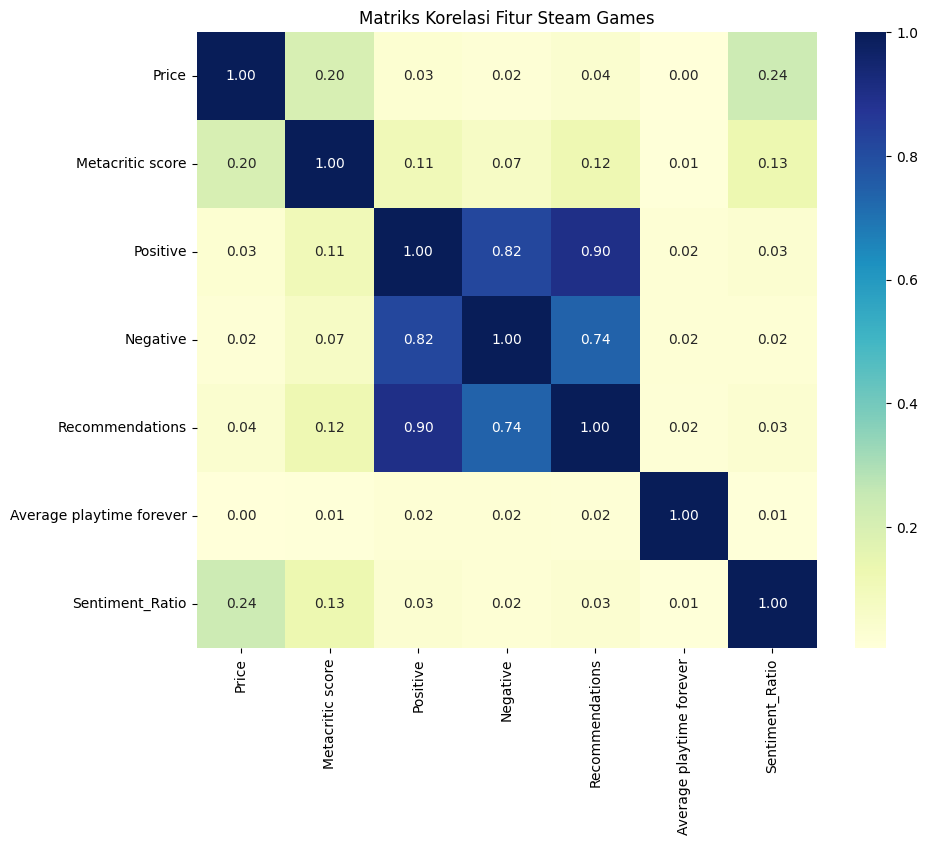

In [8]:
# Visualisasi korelasi antar fitur
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Matriks Korelasi Fitur Steam Games")
plt.show()

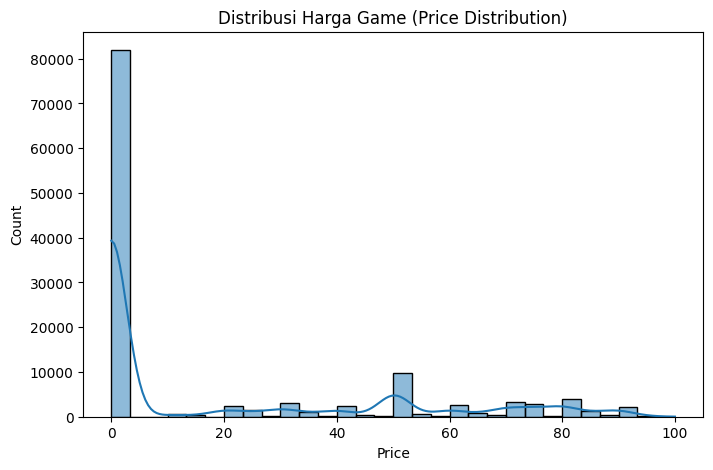

In [9]:
# Visualisasi distribusi harga
plt.figure(figsize=(8, 5))
sns.histplot(X['Price'], bins=30, kde=True)
plt.title("Distribusi Harga Game (Price Distribution)")
plt.show()

**5. Modeling & Refinement**

In [10]:
# Menggunakan RobustScaler karena data Steam memiliki outliers ekstrem [cite: 60]
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

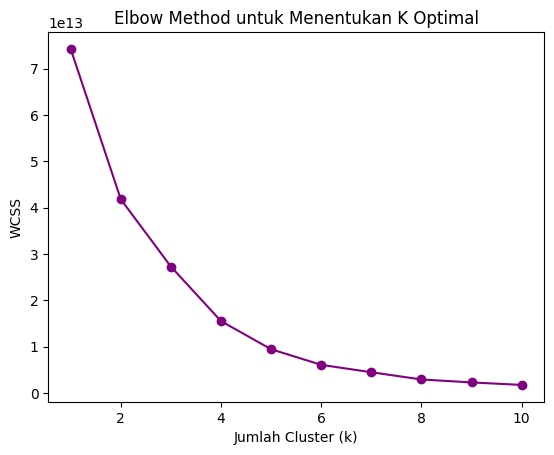

In [11]:
# Mencari K-Optimal (Elbow Method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o', color='purple')
plt.title('Elbow Method untuk Menentukan K Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS')
plt.show()

In [12]:
# Membagi pasar menjadi 4 segmen: Indie, Mainstream, AAA, dan Hidden Gems
optimal_k = 4
model = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
df_clean['Cluster'] = model.fit_predict(X_scaled)

print("Modeling Selesai. Model telah disimpan dalam dataframe.")

Modeling Selesai. Model telah disimpan dalam dataframe.


In [13]:
# 1. Menyimpan Model K-Means
model_filename = 'kmeans_steam_model.pkl'
joblib.dump(model, model_filename)

# 2. Menyimpan Scaler
scaler_filename = 'robust_scaler_steam.pkl'
joblib.dump(scaler, scaler_filename)

print(f"Model berhasil disimpan sebagai: {model_filename}")
print(f"Scaler berhasil disimpan sebagai: {scaler_filename}")

Model berhasil disimpan sebagai: kmeans_steam_model.pkl
Scaler berhasil disimpan sebagai: robust_scaler_steam.pkl


**6. Evaluasi Model & Interpretasi**

In [14]:
# Menghitung Metrik Evaluasi
sil_score = silhouette_score(X_scaled, df_clean['Cluster'])
db_index = davies_bouldin_score(X_scaled, df_clean['Cluster'])

print(f"--- Evaluasi Model ---")
print(f"Silhouette Score: {sil_score:.4f}")
print(f"Davies-Bouldin Index: {db_index:.4f}")

--- Evaluasi Model ---
Silhouette Score: 0.9981
Davies-Bouldin Index: 0.1777


**7. Analisis**

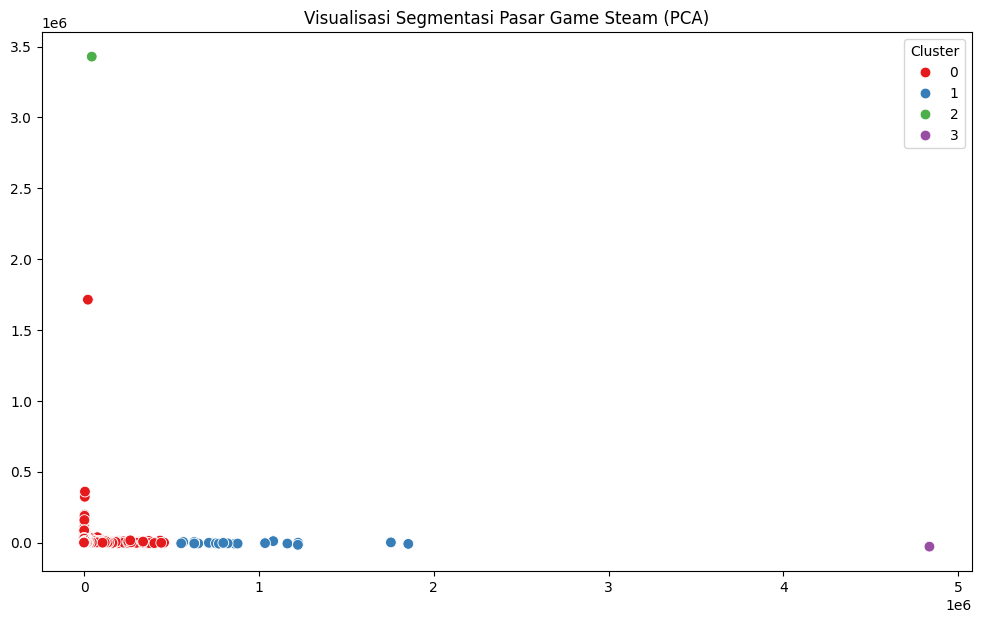

In [15]:
# Visualisasi PCA (2D Projection)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_clean['Cluster'], palette='Set1', s=60)
plt.title("Visualisasi Segmentasi Pasar Game Steam (PCA)")
plt.legend(title='Cluster')
plt.show()

In [16]:
# Melihat rata-rata fitur per cluster untuk menentukan karakteristiknya
analysis = df_clean.groupby('Cluster').mean()
print("\n--- Analisis Karakteristik Tiap Cluster ---")
display(analysis)


--- Analisis Karakteristik Tiap Cluster ---


,Price,Metacritic score,Positive,Negative,Recommendations,Average playtime forever,Sentiment_Ratio
Cluster,,,,,,,
0,18.350057,2.555697,8.049936e+02,1.345378e+02,7.205604e+02,1.783558e+02,0.512905
1,36.769231,46.346154,8.386983e+05,1.184768e+05,9.527467e+05,6.888231e+03,0.891146
2,0.000000,0.000000,2.700000e+01,1.700000e+01,0.000000e+00,3.429544e+06,0.613636
3,0.000000,0.000000,7.642084e+06,1.173003e+06,4.830455e+06,3.390600e+04,0.866932
